# About Myers-Briggs Personality Type Indicator (MBTI)
---
![](images/mbti_types.jpg)
The MBTI is a personality type system that categorizes everyone into one of 16 personalities depending on 4 measurements:
- Inroversion (I) - Extroversion (E)
- Intuition (N) - Sensing (S)
- Thinking (T) - Feeling (F)
- Judging (J) - Perceiving (P)

The MBTI test is the most popular personality test in the world, and is based on Jungian Typology created by the psychologist Carl Jung. The test's validity has come into question due to the unreliable nature of experiments surrounding it, but nonetheless is still used all over the world for business, research, and personal use. While the test may not be too scientifically accurate, it is still useful in generalizing and understanding personlity types on a surface level.

# About Dataset
---
The data was gathered through the [PersonalityCafe forum](https://www.personalitycafe.com/forum/), as it provides a large selection of people and their MBTI personality type, as well as what they have written. Keep in mind that the analysis I do is for fun and is only representative of the Personality Cafe forum and may not translate over into real-world application.

The dataset is 8675 rows with 2 columns:
- Type: The 4-letter MBTI code (INSTP, ENFJ, etc.)
- Posts: The last 50 things a user has posted, separated by "|||"

# What I Do with the Dataset
---
1. Explore trends between personality types
2. Visualize common words used by each personality type via wordclouds
3. Explore text style transfer for mimicking what each personality type might say, and its implications

## Data Exploration
---

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Text(0.5,0,'Types')

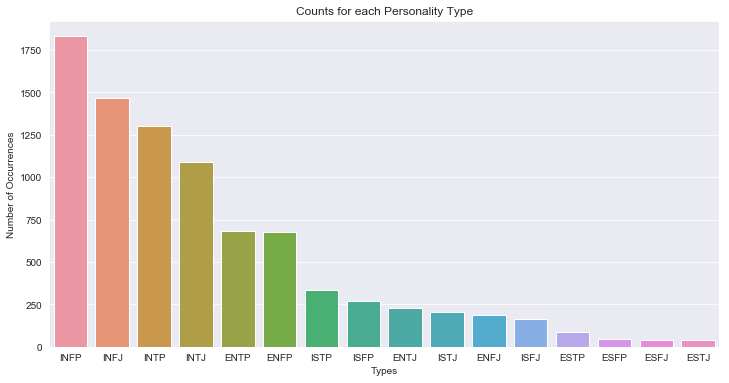

In [3]:
#plot distribution of personality types
type_count = df['type'].value_counts()

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(type_count.index, type_count.values)
plt.title('Counts for each Personality Type')
plt.ylabel('Number of Occurrences')
plt.xlabel('Types')

The forum seems to have an extremely skewed representation of the distribution of the general population's personality types. This could be because different personality types are more inclined to visit the forum (for example, if they have a more rare personality type they may be more interested in personality). The diagram below shows a more accuate distribution:
![mbti_pct](images/mbti_pct.png)

In [4]:
#helper function for word count variance
def var_word_count(posts):
    l = []
    for i in posts.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

In [5]:
#column for words per comment
df['word_count'] = df['posts'].apply(lambda x: len(x.split())/50)
#column for variance of words per comment for each user
df['word_count_var'] = df['posts'].apply(lambda x: var_word_count(x))
#column for links per comment
df['link_count'] = df['posts'].apply(lambda x: x.count('http')/50)
#column for questions per comment
df['question_count'] = df['posts'].apply(lambda x: x.count('?')/50)

In [6]:
df.head()

,type,posts,word_count,word_count_var,link_count,question_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.20


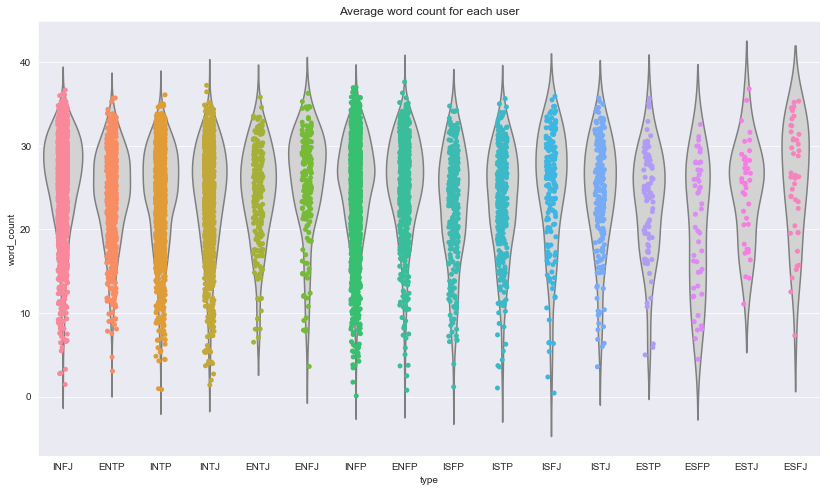

In [7]:
plt.figure(figsize=(14,8))
plt.title('Average word count for each user')
sns.violinplot('type','word_count',data=df, inner=None, color='lightgray')
sns.stripplot('type', 'word_count', data=df)

Each personality type seems to have a similar distribution of word count per post for each user. ESFP, ESTJ, and ESFJ vary slightly, but this could be because there are not many rows for these personality types, leading to skewed distributions.

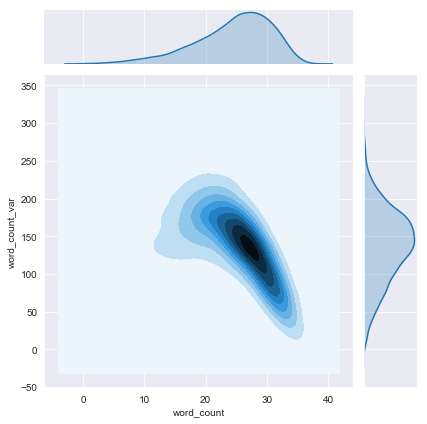

In [8]:
sns.jointplot('word_count', 'word_count_var', data=df, kind='kde')

There seems to be a clear trend of having a lower variance as average word count gets longer. This makes sense because longer posts tend to vary less in length than shorter ones. 

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


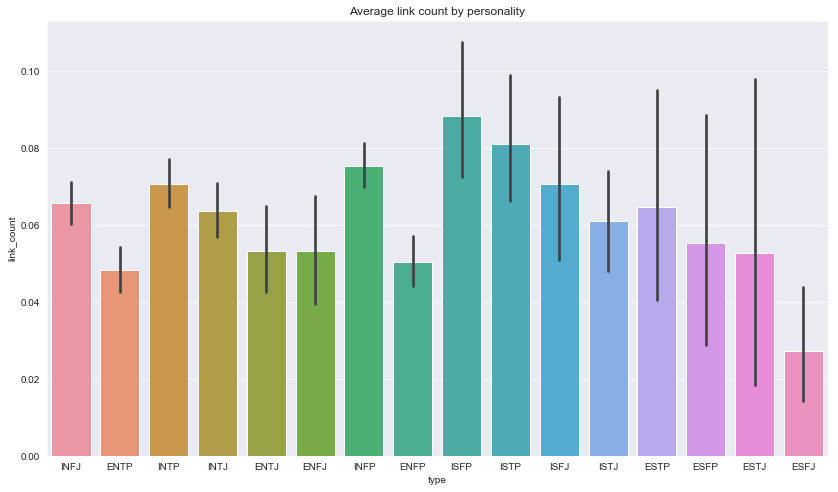

In [9]:
plt.figure(figsize=(14,8))
plt.title('Average link count by personality')
sns.barplot(x='type', y='link_count', data=df)

It seems that introverts tend to post more links per comment than extroverts. A possible explanation for this could be that introverts are more drawn towards using the internet, and thus are more likely to post links.

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


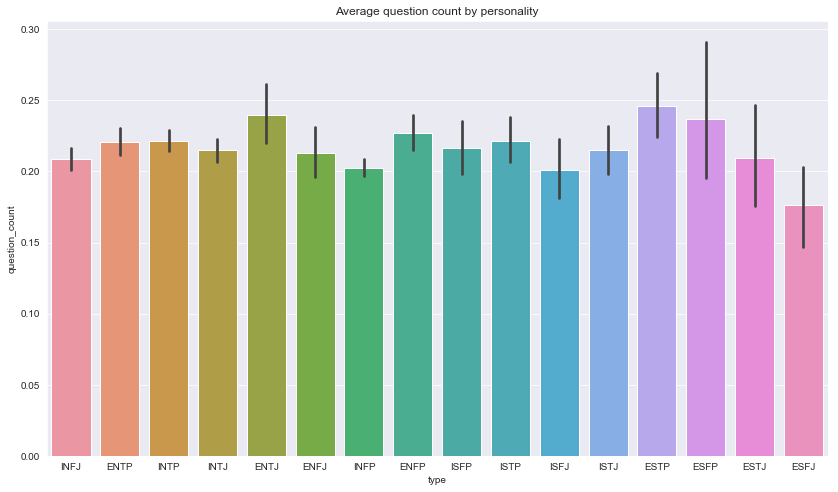

In [10]:
#average question count for each user
plt.figure(figsize=(14,8))
plt.title('Average question count by personality')
sns.barplot(x='type', y='question_count', data=df)

I predicted that introverts (I_) and those that are intuitive (N) would be more inquisitive and thus ask more questions. This does not seem to be the case, and with the exception of ESFJ all personality types tend to ask a similar number of questions. Curiously, ESFP ask a decent amount more questions than ESFJ, although this could be dismissed because ESFJ does not have a vary large sample size.

## Wordclouds
---
I wanted to look at INTJ in particular as this was the personality type I came up with after a few MBTI personality tests.

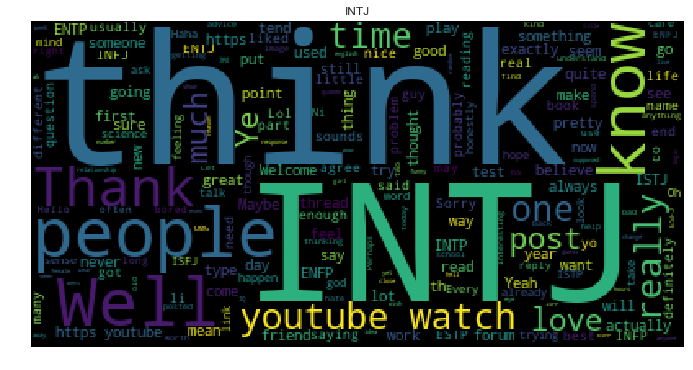

In [11]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud().generate(df[df['type']=='INTJ']['posts'].to_string())

plt.figure(figsize=(14,6))
plt.title('INTJ')
plt.axis("off")
plt.imshow(wordcloud)

The first thing I notice is "think" is the biggest word. This seems to be the case with other personality types, so a possible explanation is that people are sharing their ideas and opinions about personality and other topics, and the use of "think" is common in these scenarios.

Second, I noticed that the biggest words are think, thank, well, know, and people. Interestingly, this is the case with ENFP as well and not near as much as other personality types. 

Again, these make more sense in context of the forum the dataset is from, and not so applicable to real-world vocabulary.

Below I plotted all the other personality types to compare to INTJ and in case you want to explore trends in your own personality type:

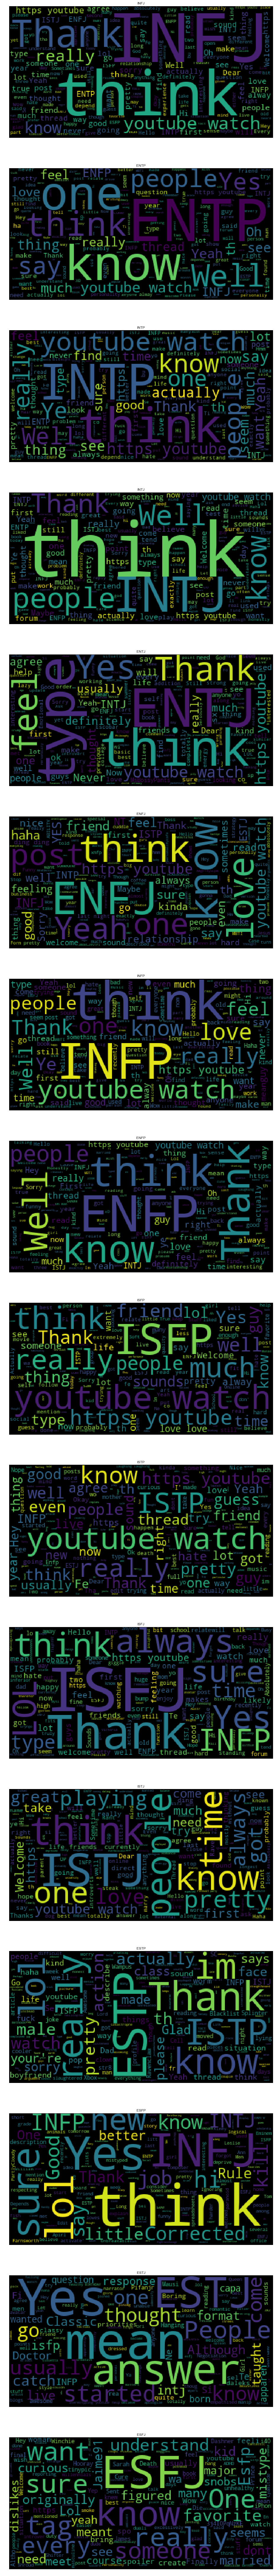

In [12]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(16,10*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_i = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_i['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

## Text Style Transfer
---
Originally, I wanted to create a new sentence with a chosen content sentence in the style of writing of a given personality type. Instead, I discovered that there are two key challenges for contextual text style transfer:

1. How to preserve the semantic meaning of the target sentence and its consistency with the surrounding context when generating an alternative sentence with a specific style 
2. How to deal with the lack of labeled parallel data. 

There are several papers out right now proposing how to overcome these problems such as [this one](https://paperswithcode.com/paper/a-syntax-aware-approach-for-unsupervised-text) and [this one](https://paperswithcode.com/paper/contextual-text-style-transfer). Soon, generating content in the style of an individual or personality type will soon be possible and widely accessible.

## Conclusion and Implications
This project demonstrated the ability to understand and analyze personality types through text as well and addressed future possibility of mimicking text style. There are several uses of these functions such as use in psychology research, understanding language based on personality types, and understanding the preferences of each personlity type for business purposes.

Another use of this dataset could be to predict what personality type a given text is. This could be extremely valuable as you could make a personality profile for an individual based off of social media posts for better ad targeting. This would most likely work better with OCEAN personality traits as this set of traits is more scientifically measurable and is a better predictor of how an individual will act. [Click here for an excellent explanation of OCEAN.](https://positivepsychology.com/big-five-personality-theory/) For example, if you can predict that an individual is more neurotic, than you can infer that they are more receptive to fear-based advertising and thus increase conversion rates.

On a more ominous note, micro-targeted advertising could mimic text to be written in a similar personlity as the user to take advantage of [human psychology that favors those who we have a perceived similarity with.](https://journals.sagepub.com/doi/abs/10.1177/0265407508096700?casa_token=TmckhC7lG2AAAAAA%3ARSf0Jx6txZ45y5WM1lHGJZT_Olumyy7T92k29Vj-G0FaT9OmHlhfbdM-Yd9TDooylh4akbrL46t8mQ) This is a fairly unsettling idea, considering that you are essentially making a voodoo doll of the user to help convert a sale. This is why intelligent and ethical use of personality and text data needs to be considered.